In [1]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

/Users/danvaldes/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
assets = ['AMTD','BABA', 'BP', 'FB', 'IBM', 'ODFL', 'SQ', 'TSLA']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2015-1-1')['Adj Close']

In [3]:
pf_data

AMTD        BABA         BP          FB         IBM  \
Date                                                                   
2015-01-02  32.019215  103.599998  27.209009   78.449997  129.241516   
2015-01-05  31.218061  101.000000  25.767183   77.190002  127.207932   
2015-01-06  30.380888  103.320000  25.574469   76.150002  124.464600   
2015-01-07  30.749966  102.129997  25.638706   76.150002  123.651100   
2015-01-08  31.398090  105.029999  26.216864   78.180000  126.338654   
...               ...         ...        ...         ...         ...   
2020-04-20  37.970001  212.130005  22.350000  178.240005  120.410004   
2020-04-21  37.490002  207.339996  21.639999  170.800003  116.760002   
2020-04-22  37.520000  209.960007  23.330000  182.279999  119.309998   
2020-04-23  37.169998  205.240005  23.379999  185.130005  121.349998   
2020-04-24  36.720001  204.360001  23.389999  190.070007  124.720001   

                  ODFL         SQ        TSLA  
Date                                           
2015-01-02   50.923161        NaN  219.309998  
2015-01-05   49.628895        NaN  210.089996  
2015-01-06   48.695976        NaN  211.279999  
2015-01-07   48.433174        NaN  210.949997  
2015-01-08   49.707729        NaN  210.619995  
...                ...        ...         ...  
2020-04-20  129.889999  61.060001  746.359985  
2020-04-21  124.169998  57.400002  686.719971  
2020-04-22  128.250000  60.959999  732.109985  
2020-04-23  141.250000  61.820000  705.630005  
2020-04-24  141.630005  62.009998  725.150024  

[1337 rows x 8 columns]

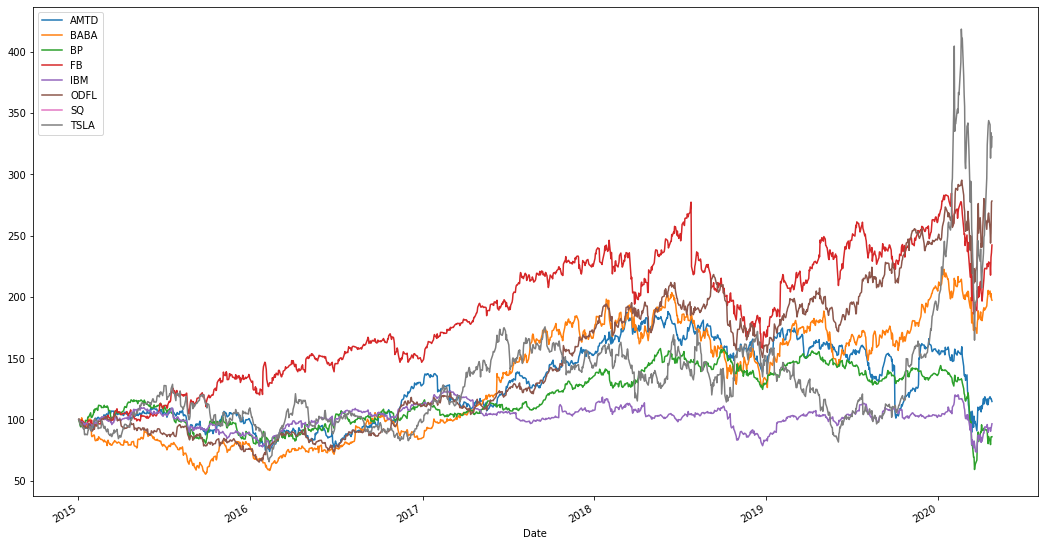

In [4]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(18,10))

In [5]:
returns = np.log(pf_data/pf_data.shift(1))

In [6]:
test_weights = np.random.random(len(assets))

test_weights /= np.sum(test_weights)

test_weights;

In [7]:
np.sum(test_weights * returns.mean()) * 250;

In [8]:
returns.cov() * 250;

In [9]:
returns.corr();

In [14]:
pf_returns = []
pf_volatilities = []
amtd_weight = []
baba_weight = []
bp_weight = []
fb_weight = []
ibm_weight = []
odfl_weight = []
sq_weight = []
tsla_weight = []

for x in range (10000):
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov() * 250, weights))))
    amtd_weight.append(weights[0])
    baba_weight.append(weights[1])
    bp_weight.append(weights[2])
    fb_weight.append(weights[3])
    ibm_weight.append(weights[4])
    odfl_weight.append(weights[5])
    sq_weight.append(weights[6])
    tsla_weight.append(weights[7])

pf = pd.DataFrame({
    "Returns":pf_returns,
    "Volatility":pf_volatilities,
    'AMTD Weight': amtd_weight,
    'BABA Weight': baba_weight,
    'BP Weight': bp_weight,
    'FB Weight': fb_weight,
    'IBM Weight': ibm_weight,
    'ODFL Weight': odfl_weight,
    'SQ Weight': sq_weight,
    'TSLA Weight': tsla_weight
})

names = pf.columns[2:].to_list()

In [15]:
px.scatter(pf, x="Volatility", y="Returns", log_x=True, hover_data=names, color='Returns')